# Part 2 - Exploratory Data Analysis
Eric Kwok

This notebook is based on [Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis](https://github.com/dataprofessor/code/blob/master/python/CDD_ML_Part_2_Exploratory_Data_Analysis.ipynb) by Chanin Nantasenamat

---

## Install rdkit
rdkit is a package we need to calculate molecular descriptors of compounds.

In [1]:
! conda install -c rdkit rdkit -y

Solving environment: - 
  - anaconda/osx-64::ca-certificates-2020.10.14-0, anaconda/osx-64::openssl-1.1.1h-haf1e3a3_0
  - anaconda/osx-64::openssl-1.1.1h-haf1e3a3_0, defaults/osx-64::ca-certificates-2020.10.14-0
  - anaconda/osx-64::ca-certificates-2020.10.14-0, defaults/osx-64::openssl-1.1.1h-haf1e3a3_0
  - defaults/osx-64::ca-certificates-2020.10.14-0, defaults/osx-64::openssl-1.1.1h-haf1e3a3done

## Package Plan ##

  environment location: /Users/erickwok/opt/anaconda3

  added / updated specs:
    - rdkit


The following packages will be UPDATED:

  certifi                anaconda::certifi-2020.6.20-py37_0 --> pkgs/main::certifi-2020.11.8-py37hecd8cb5_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done


## Load Bioactivity Data

In [2]:
import pandas as pd
df = pd.read_csv('influenza_a_preprocessed.csv')

## Calculate Lipinski Descriptors
Christopher Lipinski, a scientist at Pfizer, came up with a set of rules for evaluating the **druglikeness** (how "druglike" a substance is) of compounds. This druglikeness is based on the Absorption, Distribution, Metabolism, and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is known to be the **Rule-of_Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
- Molecular weight < 500 Daltons
- Octanol-water partition coefficient (LogP) < 5
- Hydrogen bond donors < 5
- Hydrogen bond acceptors < 10

### Import Libraries

In [3]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### Calculate Descriptors

In [4]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):
    
    mol_data = []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        mol_data.append(mol)
        
    base_data = np.empty(0)
    i = 0
    for mol in mol_data:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        
        row = np.array([desc_MolWt,
                       desc_MolLogP,
                       desc_NumHDonors,
                       desc_NumHAcceptors])
        
        if i == 0:
            base_data = row
        else:
            base_data = np.vstack([base_data, row])
            
        i += 1
        
    column_names = ['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']
    descriptors = pd.DataFrame(data=base_data, columns=column_names)
    
    return descriptors

In [5]:
df_lipinski = lipinski(df.canonical_smiles)

### Combine DataFrames
The 2 DataFrames that will be combined:

In [6]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,252.226,0.2740,4.0,4.0
1,252.226,0.2740,4.0,4.0
2,240.171,0.9570,3.0,5.0
3,240.171,0.9570,3.0,5.0
4,282.208,1.1767,2.0,6.0
...,...,...,...,...
1586,869.106,5.8766,3.0,12.0
1587,758.994,3.2791,7.0,10.0
1588,742.995,4.1642,6.0,9.0
1589,368.385,3.3699,2.0,6.0


In [7]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL327097,CC(=O)Nc1ccc(C(=O)O)cc1NC(=O)CO,4000000.0,inactive
1,CHEMBL327097,CC(=O)Nc1ccc(C(=O)O)cc1NC(=O)CO,10000000.0,inactive
2,CHEMBL324455,CC(=O)Nc1c(O)cc(C(=O)O)cc1[N+](=O)[O-],750000.0,inactive
3,CHEMBL324455,CC(=O)Nc1c(O)cc(C(=O)O)cc1[N+](=O)[O-],1000000.0,inactive
4,CHEMBL321393,CC(=O)Nc1c(OC(C)=O)cc(C(=O)O)cc1[N+](=O)[O-],5000000.0,inactive
...,...,...,...,...
1586,CHEMBL4286184,C=C(C)[C@@H]1CC[C@]2(C(=O)N[C@H]3C=C(C(=O)OC)O...,100000.0,inactive
1587,CHEMBL4294084,COC(=O)C1=C[C@H](NC(=O)[C@]23CCC(C)(C)C[C@H]2C...,40500.0,inactive
1588,CHEMBL4282791,C=C(C)[C@@H]1CC[C@]2(C(=O)N[C@H]3C=C(C(=O)OC)O...,100000.0,inactive
1589,CHEMBL140,COc1cc(/C=C/C(=O)CC(=O)/C=C/c2ccc(O)c(OC)c2)ccc1O,6700.0,intermediate


Combine the 2 DataFrames:

In [8]:
df_combined = pd.concat([df, df_lipinski], axis=1)

### Convert IC50 to pIC50
To allow **IC50** data to be more uniformly distributed, we will convert them to the negative logarithmic scale, which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
- Take the IC50 values from the `standard_value` column and converts it from nM to M by multiplying the value by 10<sup>-9</sup>
- Take the molar value and apply -log10
- Delete the `standard_value` column and create a new `pIC50` column

In [9]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

def pIC50(df):
    pIC50 = []
    
    for i in df['standard_value']:
        molar = i * (10**-9)  # Converts nM to M
        pIC50.append(-np.log10(molar))
        
    df['pIC50'] = pIC50
    x = df.drop('standard_value', 1)
    
    return x

In [10]:
df_final = pIC50(df_combined)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL327097,CC(=O)Nc1ccc(C(=O)O)cc1NC(=O)CO,inactive,252.226,0.2740,4.0,4.0,2.397940
1,CHEMBL327097,CC(=O)Nc1ccc(C(=O)O)cc1NC(=O)CO,inactive,252.226,0.2740,4.0,4.0,2.000000
2,CHEMBL324455,CC(=O)Nc1c(O)cc(C(=O)O)cc1[N+](=O)[O-],inactive,240.171,0.9570,3.0,5.0,3.124939
3,CHEMBL324455,CC(=O)Nc1c(O)cc(C(=O)O)cc1[N+](=O)[O-],inactive,240.171,0.9570,3.0,5.0,3.000000
4,CHEMBL321393,CC(=O)Nc1c(OC(C)=O)cc(C(=O)O)cc1[N+](=O)[O-],inactive,282.208,1.1767,2.0,6.0,2.301030
...,...,...,...,...,...,...,...,...
1586,CHEMBL4286184,C=C(C)[C@@H]1CC[C@]2(C(=O)N[C@H]3C=C(C(=O)OC)O...,inactive,869.106,5.8766,3.0,12.0,4.000000
1587,CHEMBL4294084,COC(=O)C1=C[C@H](NC(=O)[C@]23CCC(C)(C)C[C@H]2C...,inactive,758.994,3.2791,7.0,10.0,4.392545
1588,CHEMBL4282791,C=C(C)[C@@H]1CC[C@]2(C(=O)N[C@H]3C=C(C(=O)OC)O...,inactive,742.995,4.1642,6.0,9.0,4.000000
1589,CHEMBL140,COc1cc(/C=C/C(=O)CC(=O)/C=C/c2ccc(O)c(OC)c2)ccc1O,intermediate,368.385,3.3699,2.0,6.0,5.173925


In [11]:
df_final.pIC50.describe()

count    1591.000000
mean        6.523807
std         2.188138
min         2.000000
25%         4.698970
50%         6.045757
75%         8.414576
max        14.000000
Name: pIC50, dtype: float64

In [12]:
df_final.to_csv('influenza_a_pIC50.csv', index=False)

### Remove the "intermediate" bioactivity class
Here, we will remove the "intermediate" class from our dataset.

In [13]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL327097,CC(=O)Nc1ccc(C(=O)O)cc1NC(=O)CO,inactive,252.226,0.2740,4.0,4.0,2.397940
1,CHEMBL327097,CC(=O)Nc1ccc(C(=O)O)cc1NC(=O)CO,inactive,252.226,0.2740,4.0,4.0,2.000000
2,CHEMBL324455,CC(=O)Nc1c(O)cc(C(=O)O)cc1[N+](=O)[O-],inactive,240.171,0.9570,3.0,5.0,3.124939
3,CHEMBL324455,CC(=O)Nc1c(O)cc(C(=O)O)cc1[N+](=O)[O-],inactive,240.171,0.9570,3.0,5.0,3.000000
4,CHEMBL321393,CC(=O)Nc1c(OC(C)=O)cc(C(=O)O)cc1[N+](=O)[O-],inactive,282.208,1.1767,2.0,6.0,2.301030
...,...,...,...,...,...,...,...,...
1585,CHEMBL4283912,COC(=O)C1=C[C@H](NC(=O)[C@]23CCC(C)(C)C[C@H]2C...,inactive,885.105,4.9915,4.0,13.0,4.809668
1586,CHEMBL4286184,C=C(C)[C@@H]1CC[C@]2(C(=O)N[C@H]3C=C(C(=O)OC)O...,inactive,869.106,5.8766,3.0,12.0,4.000000
1587,CHEMBL4294084,COC(=O)C1=C[C@H](NC(=O)[C@]23CCC(C)(C)C[C@H]2C...,inactive,758.994,3.2791,7.0,10.0,4.392545
1588,CHEMBL4282791,C=C(C)[C@@H]1CC[C@]2(C(=O)N[C@H]3C=C(C(=O)OC)O...,inactive,742.995,4.1642,6.0,9.0,4.000000


## Exploratory Data Analysis (Chemical Space Analysis) via Lipinski Descriptors
### Import libraries

In [14]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### Frequency plot of the 2 bioactivity classes

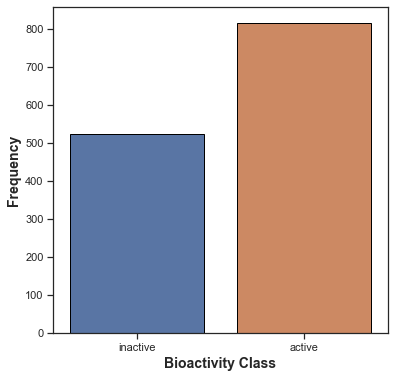

In [15]:
plt.figure(figsize=(6, 6))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### Scatter plot of MW vs. LogP

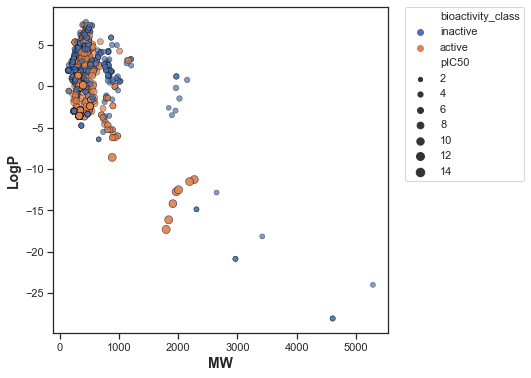

In [16]:
plt.figure(figsize=(6, 6))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### Box plots
#### pIC50 value

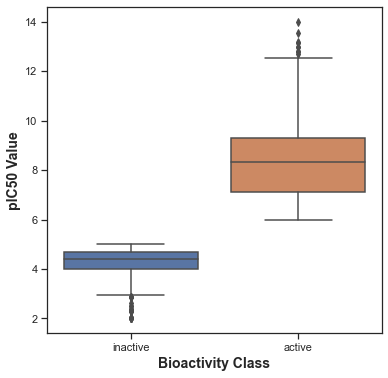

In [17]:
plt.figure(figsize=(6, 6))

sns.boxplot(x='bioactivity_class', y='pIC50', data=df_2class)

plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 Value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

#### Statistical analysis | Mann-Whitney U Test

In [18]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu

# https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
def mannwhitney(descriptor, verbose=False):
    # Seed random number generator
    seed(1)
    
    # Actives and inactives
    selection = [descriptor, 'bioactivity_class']
    df = df_2class[selection]
    active = df[df.bioactivity_class == 'active']
    active = active[descriptor]
    
    selection = [descriptor, 'bioactivity_class']
    df = df_2class[selection]
    inactive = df[df.bioactivity_class == 'inactive']
    inactive = inactive[descriptor]
    
    # Compare samples
    stat, p = mannwhitneyu(active, inactive)
    
    # Interpret
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'
        
    results = pd.DataFrame({'Descriptor': descriptor,
                           'Statistics': stat,
                           'p': p,
                           'alpha': alpha,
                           'Interpretation': interpretation}, index=[0])
    filename = 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename)
    
    return results

In [19]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,1.075664e-210,0.05,Different distribution (reject H0)


#### MW

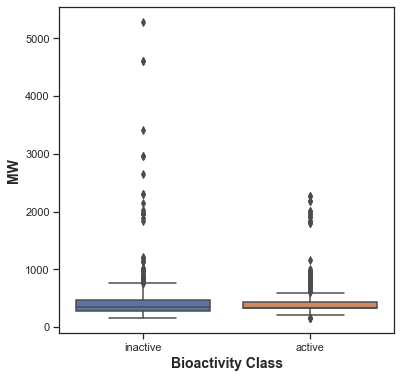

In [20]:
plt.figure(figsize=(6, 6))

sns.boxplot(x='bioactivity_class', y='MW', data=df_2class)

plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [21]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,204518.0,0.075448,0.05,Same distribution (fail to reject H0)


#### LogP

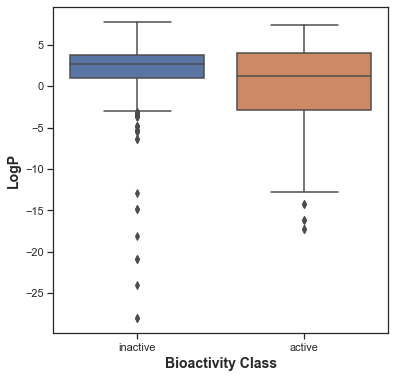

In [22]:
plt.figure(figsize=(6, 6))

sns.boxplot(x='bioactivity_class', y='LogP', data=df_2class)

plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [23]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,160438.0,3.008657e-15,0.05,Different distribution (reject H0)


#### NumHDonors

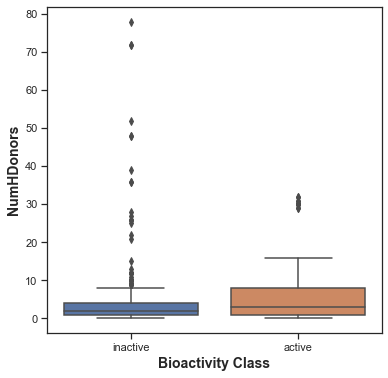

In [24]:
plt.figure(figsize=(6, 6))

sns.boxplot(x='bioactivity_class', y='NumHDonors', data=df_2class)

plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [25]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,170798.0,1.013245e-10,0.05,Different distribution (reject H0)


#### NumHAcceptors

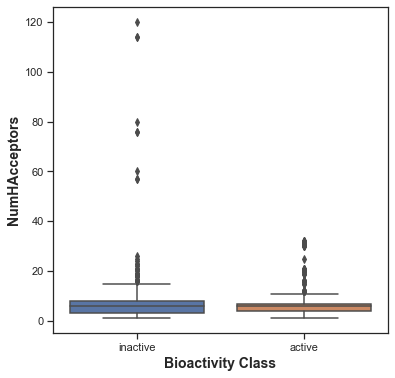

In [26]:
plt.figure(figsize=(6, 6))

sns.boxplot(x='bioactivity_class', y='NumHAcceptors', data=df_2class)

plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [27]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,210322.0,0.273249,0.05,Same distribution (fail to reject H0)


#### Interpretation of Statistical Results
##### pIC50 values
Regarding pIC50 values, the actives and inactives displayed a **statistically significant difference**, which is to be expected because threshold values (IC50 < 1,000 nM = Actives and IC50 > 10,000 nM = Inactives) were used to define actives and inactives.
##### Lipinski's descriptors
Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors, and NumHAcceptors), MW and NumHAcceptors exhibit **no difference** between the actives and inactives, while LogP and NumHDonors exhibit a **statistically significant difference** between the actives and inactives.